# Recognizing handwritten digits using CNN

Dataset is downloaded from Kaggle. Load train and test data using pandas.

In [42]:
import pandas as pd

data = pd.read_csv("digit-recognizer/train.csv")
test_X = pd.read_csv("digit-recognizer/test.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check for missing values.

In [44]:
cols_with_missing = [col for col in data.columns if 
                    data[col].isnull().any()]
cols_with_missing

[]

In [45]:
test_cols_with_missing = [col for col in test_X.columns if 
                         test_X[col].isnull().any()]
test_cols_with_missing

[]

No missing values.
Separate target from predictors and spilt into training and validation datasets.

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop(['label'], axis=1)
y = data['label']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=4)

Normalize data.

In [47]:
X = X / 255
test_X = test_X /255

Reshape image data to 3d so that it is compatible with CNN.

In [50]:
X_3d = X.values.reshape(-1,28,28,1)
test_X_3d = test_X.values.reshape(-1,28,28,1)

Visualize the pixel data of the first few rows.

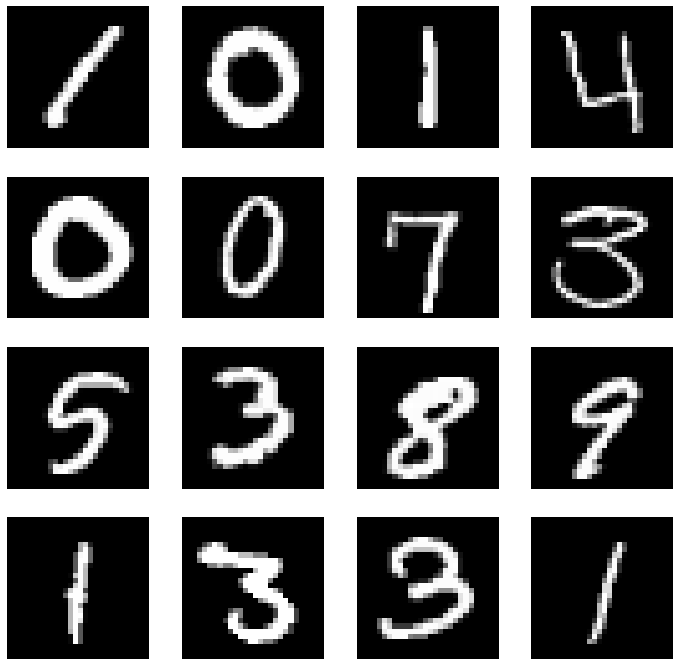

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(12, 12))
for i in range(16):
    ax = axes[i // 4, i % 4]
    ax.imshow(X_3d[i][:,:,0], cmap=plt.cm.gray)
    ax.axis('off')
plt.show()

Split data into training and validation sets

In [55]:
train_X, valid_X, train_y, valid_y = train_test_split(X_3d, y, test_size=0.2, train_size=0.8, random_state=4)

### Model

Creating CNN with 3 Conv2D layers followed by MaxPooling2D and Dropout layers.

In [57]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [58]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
from tensorflow.keras import callbacks

# Early stopping to prevent overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                                         patience=10, 
                                         restore_best_weights=True)

# Fit model
history = model.fit(train_X, train_y, 
                    batch_size=100,
                    epochs=80, 
                    validation_data=(valid_X, valid_y),
                    callbacks=[early_stopping])

Epoch 1/80
336/336 [==============================] - 7s 21ms/step - loss: 0.7756 - accuracy: 0.7469 - val_loss: 0.2005 - val_accuracy: 0.9396
Epoch 2/80
336/336 [==============================] - 7s 22ms/step - loss: 0.2713 - accuracy: 0.9180 - val_loss: 0.1282 - val_accuracy: 0.9627
Epoch 3/80
336/336 [==============================] - 7s 20ms/step - loss: 0.2113 - accuracy: 0.9357 - val_loss: 0.1053 - val_accuracy: 0.9696
Epoch 4/80
336/336 [==============================] - 7s 20ms/step - loss: 0.1769 - accuracy: 0.9456 - val_loss: 0.0911 - val_accuracy: 0.9721
Epoch 5/80
336/336 [==============================] - 6s 19ms/step - loss: 0.1541 - accuracy: 0.9532 - val_loss: 0.0787 - val_accuracy: 0.9771
Epoch 6/80
336/336 [==============================] - 6s 19ms/step - loss: 0.1360 - accuracy: 0.9590 - val_loss: 0.0775 - val_accuracy: 0.9761
Epoch 7/80
336/336 [==============================] - 7s 21ms/step - loss: 0.1311 - accuracy: 0.9601 - val_loss: 0.0718 - val_accuracy: 0.9792

Create confusion matrix to evaluate model.

263/263 [==============================] - 0s 2ms/step


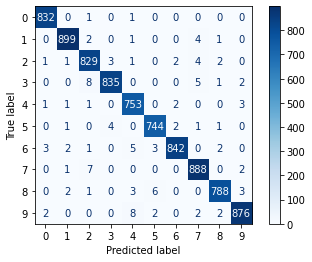

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on the validation set
preds = model.predict(valid_X)
preds = np.argmax(preds, axis=1)

# Create confusion matrix
cm = confusion_matrix(valid_y, preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model seems to perform fairly well on the validation data. It has a little trouble with 7s, 3s, 6s, 8s and 9s.

In [67]:
# Predict on test data
test_preds = model.predict(test_X_3d)
test_preds = np.argmax(test_preds,axis = 1)

output = pd.DataFrame({"ImageId": range(1,28001),
                       "Label": test_preds})

875/875 [==============================] - 1s 2ms/step


In [68]:
output.to_csv('submission.csv', index=)
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


This submission earned a score of 0.98646 accuracy.